# Preparação dos dados
Antes de começar a modelagem, vamos preparar os dados. Primeiramente, verificaremos se há dados nulos ou data types inconsistentes.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Importando os dados
df = pd.read_csv("Plannera - Case de Data Science.csv", sep=';')
df = df.drop('Dropsize', axis=1)

df['DataEntrega'] = pd.to_datetime(df['DataEntrega'], dayfirst=True)
df = df.set_index('DataEntrega')

#Imprime o dataframe
df.head()

,Cluster,Volume,Remessas
DataEntrega,,,
2019-10-01,A,3112.34,466.0
2019-10-01,B,28.60,5.0
2019-10-01,C,7613.48,898.0
2019-10-01,D,741.40,159.0
2019-10-01,E,2127.68,441.0


Vemos abaixo que os data types das colunas de Volume e Remessas são numéricos, conforme esperado.

In [2]:
# Verificando os data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3360 entries, 2019-10-01 to 2020-08-31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cluster   3360 non-null   object 
 1   Volume    3360 non-null   float64
 2   Remessas  3360 non-null   float64
dtypes: float64(2), object(1)
memory usage: 91.9+ KB


Não existem dados nulos em nossa série temporal:

In [3]:
# Contando os dados nulos
df.isnull().sum()

Cluster     0
Volume      0
Remessas    0
dtype: int64

Para formatar nosso dataframe de forma apropriada, vamos criar uma coluna de Volume e uma coluna de Remessas para cada um dos clusters.

In [4]:
# Criar uma lista de dfs. Cada df carrega as informações de um único cluster
dfs = []
for cluster in df.Cluster.unique():
    dfs.append(df[df.Cluster == cluster].rename(columns={'Volume': f'Volume_{cluster}', 'Remessas': f'Remessas_{cluster}'}).drop('Cluster', axis=1))
    
# concatenar os dataframes individuais de cada cluster num único dataframe
df2 = pd.concat(dfs, axis=1)
df2.head()

,Volume_A,Remessas_A,Volume_B,Remessas_B,Volume_C,Remessas_C,Volume_D,Remessas_D,Volume_E,Remessas_E,Volume_F,Remessas_F,Volume_J,Remessas_J,Volume_K,Remessas_K,Volume_L,Remessas_L,Volume_M,Remessas_M
DataEntrega,,,,,,,,,,,,,,,,,,,,
2019-10-01,3112.34,466.0,28.60,5.0,7613.48,898.0,741.40,159.0,2127.68,441.0,492.70,116.0,3863.72,529.0,0.00,0.0,0.00,0.0,0.00,0.0
2019-10-02,3397.08,496.0,9966.92,847.0,869.70,103.0,866.82,196.0,1523.66,391.0,466.02,119.0,2122.22,494.0,0.00,0.0,0.00,0.0,0.00,0.0
2019-10-03,3420.58,574.0,2336.12,571.0,411.52,192.0,948.04,219.0,8327.02,1059.0,17149.62,2380.0,1414.80,218.0,1989.22,386.0,573.22,122.0,3164.32,493.0
2019-10-04,2443.64,476.0,2253.90,641.0,477.16,211.0,976.52,303.0,13219.70,1174.0,34265.04,3977.0,805.66,186.0,2300.84,386.0,551.50,131.0,3373.32,503.0
2019-10-05,97.92,11.0,381.02,51.0,896.78,102.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0


Assim, temos uma coluna de Volume e uma coluna de Remessa para cada cluster. Ao todo, são 336 linhas, uma para cada dia. Os data types estão todos numéricos, conforme esperado:

In [5]:
# Verificando as colunas e data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 2019-10-01 to 2020-08-31
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume_A    336 non-null    float64
 1   Remessas_A  336 non-null    float64
 2   Volume_B    336 non-null    float64
 3   Remessas_B  336 non-null    float64
 4   Volume_C    336 non-null    float64
 5   Remessas_C  336 non-null    float64
 6   Volume_D    336 non-null    float64
 7   Remessas_D  336 non-null    float64
 8   Volume_E    336 non-null    float64
 9   Remessas_E  336 non-null    float64
 10  Volume_F    336 non-null    float64
 11  Remessas_F  336 non-null    float64
 12  Volume_J    336 non-null    float64
 13  Remessas_J  336 non-null    float64
 14  Volume_K    336 non-null    float64
 15  Remessas_K  336 non-null    float64
 16  Volume_L    336 non-null    float64
 17  Remessas_L  336 non-null    float64
 18  Volume_M    336 non-null    float64
 19  Remessas_M

Por fim, exportamos nossos dados para seguir com a análise:

In [6]:
#exportar o dataframe
df2.to_csv('dados.csv')

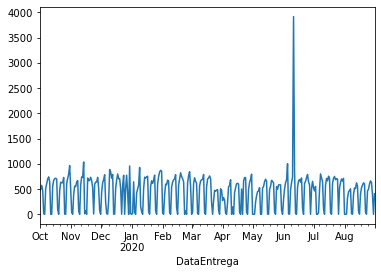

In [7]:
df2.Remessas_A.plot()

In [8]:
df2.loc['2020-08-23']

Volume_A      2.6
Remessas_A    2.0
Volume_B      0.0
Remessas_B    0.0
Volume_C      0.0
Remessas_C    0.0
Volume_D      0.0
Remessas_D    0.0
Volume_E      0.0
Remessas_E    0.0
Volume_F      0.0
Remessas_F    0.0
Volume_J      0.0
Remessas_J    0.0
Volume_K      0.0
Remessas_K    0.0
Volume_L      0.0
Remessas_L    0.0
Volume_M      0.0
Remessas_M    0.0
Name: 2020-08-23 00:00:00, dtype: float64